In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
RANDOM_SEED = 42
DATA_PATH = "data/"
DATA_FILE = "processed_traffic.parquet"

In [ ]:
data = pd.read_parquet(DATA_PATH + DATA_FILE)

X, y = data.drop(columns=["Attack Name", "Label"]), data["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

### Hyperparameter grid

All parameters to be tested were chosen by wanting to have computational cost in mind while still allowing experiemntation with model complexity and generalization.



In [28]:
param_grid ={
    "n_estimators": [100, 300, 500],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2,10,50],
    "min_samples_leaf": [1,5,10]
}

In [29]:
rf = RandomForestClassifier(random_state = RANDOM_SEED, n_jobs=-1)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
)

In [30]:
grid.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 5, ...], 'min_samples_split': [2, 10, ...], 'n_estimators': [100, 300, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [31]:
print("\nBest RF Parameters:", grid.best_params_)
best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test)


Best RF Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [32]:
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test,
    y_pred,
))


Random Forest Accuracy: 0.9704889031843036

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      6476
           1       0.98      0.96      0.97      5960

    accuracy                           0.97     12436
   macro avg       0.97      0.97      0.97     12436
weighted avg       0.97      0.97      0.97     12436



### Feature importance

In [34]:
importances = best_rf.feature_importances_

feat_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_importances.head(10)

,Feature,Importance
0,Src Port,0.105726
2,Flow Duration,0.085356
12,Flow Packets/s,0.059522
18,Bwd IAT Total,0.049799
23,Bwd Packets/s,0.045540
24,Packet Length Mean,0.044308
13,Flow IAT Mean,0.042579
33,Average Packet Size,0.040949
19,Bwd IAT Mean,0.036746
22,Fwd Packets/s,0.035281


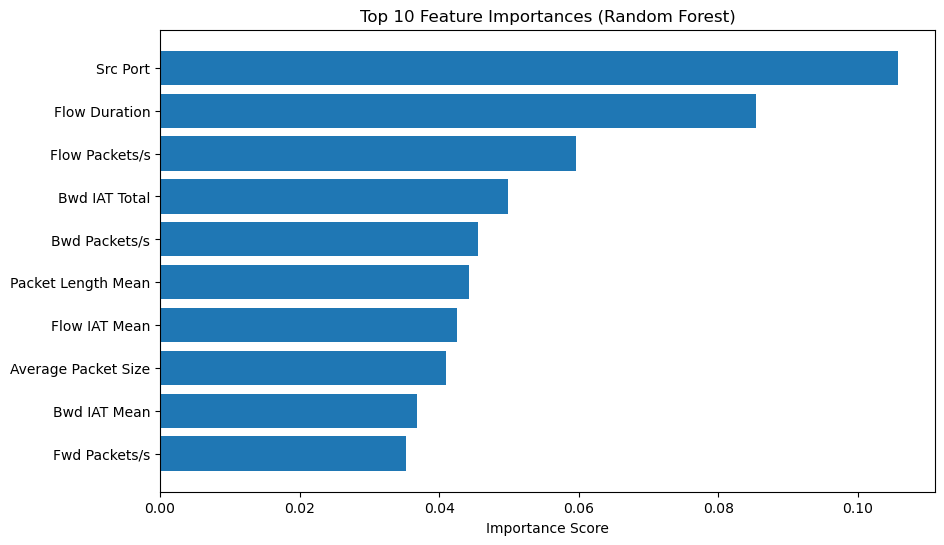

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feat_importances["Feature"][:10], feat_importances["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()